In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [4]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=False,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmpdrk9uyu8GP2
Using default discriminator (CNN)


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

In [6]:
images = images[:5000]
masks = masks[:5000]

In [7]:
images.shape

(5000, 512, 512, 1)

In [8]:
masks.shape

(5000, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
4/4 [==============================] - 26s 4s/step - loss: 0.6929 - dice_coeff: 0.3449 - val_loss: 0.6924 - val_dice_coeff: 0.2748
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 0.6925 - dice_coeff: 0.3462 - val_loss: 0.6918 - val_dice_coeff: 0.2745
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: 0.6920 - dice_coeff: 0.3460 - val_loss: 0.6911 - val_dice_coeff: 0.2741
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 0.6914 - dice_coeff: 0.3449 - val_loss: 0.6903 - val_dice_coeff: 0.2737
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 0.6908 - dice_coeff: 0.3438 - val_loss: 0.6895 - val_dice_coeff: 0.2733
Epoch 6/100
4/4 [==============================] - 4s 1s/step - loss: 0.6902 - dice_coeff: 0.3431 - val_loss: 0.6886 - val_dice_coeff: 0.2729
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: 0.6895 - dice_coeff: 0.3424 - val_loss: 0.6875 - va

In [11]:
R.classifier_scores

[[0.23144613206386566, 0.5855432152748108],
 [0.2059963345527649, 0.7106050252914429],
 [0.21873848140239716, 0.6970434188842773],
 [0.21148240566253662, 0.6745205521583557],
 [0.2089163064956665, 0.6839752793312073],
 [0.18944844603538513, 0.7151911854743958],
 [0.2044941633939743, 0.7096549272537231],
 [0.21146681904792786, 0.6557793021202087]]

In [12]:
R.discriminator_scores

[[5.9983816754538566e-05, 1.0],
 [0.00012992156553082168, 1.0],
 [0.0005548837943933904, 1.0],
 [0.0005634596454910934, 1.0],
 [2.08082656172337e-05, 1.0],
 [0.0002552102960180491, 1.0],
 [0.00028648573788814247, 1.0],
 [2.5130393623840064e-05, 1.0]]

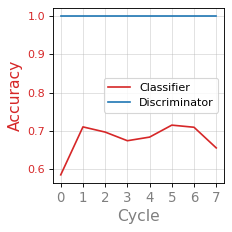

In [13]:
R.plot()